# ЛР 1-5 (Шуленков 406)

# ЛР1 (KNN)

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, r2_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Предобработка данных для задачи классификации

In [404]:
# Cчитывание 
data_classification = pd.read_csv(r'C:\Users\xwxsz\Desktop\Video_games_esrb_rating.csv')
data_classification.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [405]:
data_classification.dtypes

title                       object
console                      int64
alcohol_reference            int64
animated_blood               int64
blood                        int64
blood_and_gore               int64
cartoon_violence             int64
crude_humor                  int64
drug_reference               int64
fantasy_violence             int64
intense_violence             int64
language                     int64
lyrics                       int64
mature_humor                 int64
mild_blood                   int64
mild_cartoon_violence        int64
mild_fantasy_violence        int64
mild_language                int64
mild_lyrics                  int64
mild_suggestive_themes       int64
mild_violence                int64
no_descriptors               int64
nudity                       int64
partial_nudity               int64
sexual_content               int64
sexual_themes                int64
simulated_gambling           int64
strong_janguage              int64
strong_sexual_conten

In [406]:
label_encoder = LabelEncoder()

data_classification['title'] = label_encoder.fit_transform(data_classification['title'])
data_classification['esrb_rating'] = label_encoder.fit_transform(data_classification['esrb_rating'])

# Предобработка данных для задачи регрессии

In [407]:
data_regression = pd.read_csv(r'C:\Users\xwxsz\Desktop\day.csv')
data_regression.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [408]:
data_regression.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [409]:
label_encoder = LabelEncoder()

data_regression['dteday'] = label_encoder.fit_transform(data_regression['dteday'])

# Классификация (бейзлайн)

In [410]:
# Разделение данных

X_class = data_classification.drop('esrb_rating', axis=1) 
y_class = data_classification['esrb_rating']  

In [411]:
# Разделение данных на тестовую и обучающую выборку

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

In [412]:
# Масштабирование данных
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

In [413]:
# Обучение модели KNN
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(X_train_class, y_train_class)
y_pred_class_knn = knn_class.predict(X_test_class)

In [414]:
# Оценка качества модели
accuracy_knn = accuracy_score(y_test_class, y_pred_class_knn)
f1_knn = f1_score(y_test_class, y_pred_class_knn, average='weighted')

In [415]:
print(f'Accuracy (KNN, Классификация): {accuracy_knn}')
print(f'F1 (KNN, Классификация): {f1_knn}')

Accuracy (KNN, Классификация): 0.8047493403693932
F1 (KNN, Классификация): 0.8025380280601467


# Регрессия (бейзлайн)

In [416]:
# Разделение данных

X = data_regression.drop(columns=['cnt', 'casual', 'registered', 'dteday', 'instant'])  # Убираем 'cnt', 'casual', 'registered', 'dteday', 'instant'
y = data_regression['cnt']  # Целевая переменная

In [417]:
# Разделение данных на тестовую и обучающую выборку

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [418]:
# KNN для регрессии

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [419]:
# Оценка модели

mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

In [420]:
print(f'MAE (KNN, регрессия): {mae_knn}')
print(f'R^2 (KNN, регрессия): {r2_knn}')

MAE (KNN, регрессия): 737.1836734693877
R^2 (KNN, регрессия): 0.7402269704600081


# Классификация (улучшенный бейзлайн)

In [421]:
# Разделение

X = data_classification.drop(columns=['esrb_rating'])
y = data_classification['esrb_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [422]:
# Создание пайплайна

pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Обработка пропущенных значений
    ('scaler', StandardScaler()),  # Масштабирование данных
    ('knn', KNeighborsClassifier())  # Модель KNN
])

In [423]:
# Определение гиперпараметров для подбора

param_grid_classification = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  # Проверим разные значения для n_neighbors
    'knn__weights': ['uniform', 'distance'],  # Типы взвешивания
}

In [424]:
# Настройка GridSearch для подбора гиперпараметров по метрике F1

grid_search_classification = GridSearchCV(pipeline, param_grid_classification, cv=5, n_jobs=-1, scoring='f1_weighted')

In [425]:
# Обучение модели с подбором гиперпараметров

grid_search_classification.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [426]:
# Лучшие гиперпараметры

print(f'Лучшие гиперпараметры: {grid_search_classification.best_params_}')

Лучшие гиперпараметры: {'knn__n_neighbors': 7, 'knn__weights': 'distance'}


In [427]:
# Оценка модели

y_pred = grid_search_classification.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred, average='weighted')

In [428]:
print(f'Accuracy (KNN, классификация): {accuracy_knn}')
print(f'F1 (KNN, классификация): {f1_knn}')

Accuracy (KNN, классификация): 0.8284960422163589
F1 (KNN, классификация): 0.8271962395000577


# Регрессия (улучшенный бейзлайн)

In [429]:
# Разделение 

X = data_regression.drop(columns=['cnt'])  # 'cnt' — целевая переменная
y = data_regression['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [430]:
# Создание пайплайна

pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Обработка пропущенных значений
    ('scaler', StandardScaler()),  # Масштабирование данных
    ('knn', KNeighborsRegressor())  # Модель KNN для регрессии
])

In [431]:
# Определение гиперпараметров для подбора

param_grid_regression = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  # Проверим разные значения для n_neighbors
    'knn__weights': ['uniform', 'distance'],  # Типы взвешивания
}

In [432]:
# Настройка GridSearch для подбора гиперпараметров по метрике R2

grid_search_regression = GridSearchCV(pipeline, param_grid_regression, cv=5, n_jobs=-1, scoring='r2')

In [433]:
# Обучение модели с подбором гиперпараметров
grid_search_regression.fit(X_train, y_train)

# Лучшие гиперпараметры
print(f'Лучшие гиперпараметры: {grid_search_regression.best_params_}')

Лучшие гиперпараметры: {'knn__n_neighbors': 5, 'knn__weights': 'distance'}


In [434]:
# Оценка модели
y_pred = grid_search_regression.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [435]:
print(f'MAE (KNN, регрессия): {mae}')
print(f'R2 (KNN, регрессия): {r2}')

MAE (KNN, регрессия): 420.8514875892362
R2 (KNN, регрессия): 0.9106997408666617


# Классификация (Самостоятельная имплементация)

In [436]:
# Разделение

X = data_classification.drop('esrb_rating', axis=1)
y = data_classification['esrb_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [437]:
# Стандартизация данных

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [438]:
# Реализация алгоритма KNN
class KNN:
    def __init__(self, k=3, ):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)
    
    def _predict(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train.iloc[i] for i in k_indices]  # Используем .iloc для индексации
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

In [439]:
# Обучение модели

knn = KNN(k=5)
knn.fit(X_train_scaled, y_train)

In [440]:
# Оценка модели

y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [441]:
print(f"Accuracy (KNN, классификация): {accuracy}")
print(f"F1 (KNN, классификация): {f1}")

Accuracy (KNN, классификация): 0.8073878627968337
F1 (KNN, классификация): 0.8052817500847229


In [442]:
# Улучшенный KNN-классификатор
class ImprovedKNNClassifier:
    def __init__(self, k=5, weighted=True):
        self.k = k
        self.weighted = weighted
        self.scaler = StandardScaler()

    def fit(self, X, y):
        self.X_train = self.scaler.fit_transform(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X_test = self.scaler.transform(X)
        predictions = []
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]

            if self.weighted:
                weights = 1 / (distances[k_indices] + 1e-5)  # Для предотвращения деления на ноль
                predicted_label = np.bincount(k_nearest_labels, weights=weights).argmax()
            else:
                predicted_label = np.bincount(k_nearest_labels).argmax()

            predictions.append(predicted_label)

        return np.array(predictions)

    def tune_k(self, X, y, k_values):
        X_scaled = self.scaler.fit_transform(X)
        best_k = None
        best_score = 0
        for k in k_values:
            self.k = k
            preds = self.predict(X_scaled)
            score = accuracy_score(y, preds)
            if score > best_score:
                best_score = score
                best_k = k
        self.k = best_k
        return best_k

    def evaluate(self, X, y):
        preds = self.predict(X)
        accuracy = accuracy_score(y, preds)
        f1 = f1_score(y, preds, average='weighted')
        return accuracy, f1

In [443]:
# Разделение 

X = data_classification.drop(columns=['esrb_rating'])  # Замените на имя столбца с целевой переменной
y = data_classification['esrb_rating']  # Целевая переменная (например, рейтинг)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [444]:
# Создание и обучение модели

knn = ImprovedKNNClassifier(k=5, weighted=True)
knn.fit(X_train, y_train)

In [445]:
# Подбор оптимального значения k
best_k = knn.tune_k(X_train, y_train, k_values=range(3, 20))
print(f"Лучшее значение k: {best_k}")

Лучшее значение k: 4


In [446]:
# Прогнозирование

predictions = knn.predict(X_test)

# Оценка модели

accuracy, f1 = knn.evaluate(X_test, y_test)

In [447]:
print(f"Accuracy (KNN, классификация): {accuracy}")
print(f"F1-метрика модели: {f1}")

Accuracy (KNN, классификация): 0.8126649076517151
F1-метрика модели: 0.8121154748781471


# Регрессия (Самостоятельная имплементация)

In [448]:
# Разделдение 

X = data_regression.drop(['cnt'], axis=1) 
y = data_regression['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [449]:
# Масштабирование данных

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [450]:
# Реализация алгоритма KNN для регрессии
class KNNRegressor:
    def __init__(self, k=5, weighted=True):
        self.k = k
        self.weighted = weighted
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)
    
    def _predict(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train.iloc[k_indices]

        if self.weighted:
            weights = 1 / (np.array(distances)[k_indices] + 1e-5)  # Для предотвращения деления на ноль
            predicted_label = np.average(k_nearest_labels, weights=weights)
        else:
            predicted_label = np.mean(k_nearest_labels)

        return predicted_label
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))


In [451]:
# Создание и обучение модели
knn_regressor = KNNRegressor(k=5, weighted=True)
knn_regressor.fit(X_train_scaled, y_train)

# Прогнозирование
y_pred = knn_regressor.predict(X_test_scaled)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE (KNN, регрессия): {mae}")
print(f"R^2 (KNN, регрессия): {r2}")

MAE (KNN, регрессия): 420.85160818300585
R^2 (KNN, регрессия): 0.9106997137444722


In [452]:
class ImprovedKNNRegressor:
    def __init__(self, k=5, weighted=True):
        self.k = k
        self.weighted = weighted

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X.values:
            distances = np.linalg.norm(self.X_train.values - x, axis=1)
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train.values[k_indices]

            if self.weighted:
                weights = 1 / (distances[k_indices] + 1e-5)  # Для предотвращения деления на ноль
                predicted_label = np.bincount(k_nearest_labels, weights=weights).argmax()
            else:
                predicted_label = np.bincount(k_nearest_labels).argmax()

            predictions.append(predicted_label)

        return np.array(predictions)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mae = mean_absolute_error(y, y_pred)
        r2 = np.corrcoef(y, y_pred)[0, 1] ** 2
        return mae, r2

    def get_params(self, deep=True):
        # Возвращаем параметры модели для GridSearchCV
        return {'k': self.k, 'weighted': self.weighted}

    def set_params(self, **params):
        # Устанавливаем параметры модели
        for param, value in params.items():
            setattr(self, param, value)
        return self

In [453]:
# Разделение

X = data_regression.drop(['cnt'], axis=1)  
y = data_regression['cnt']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель
knn_regressor = ImprovedKNNRegressor(weighted=True)

# Определяем параметры для подбора с GridSearchCV
param_grid = {
    'k': range(3, 20),  # Разные значения k
    'weighted': [True, False]  # Попробуем с и без взвешивания
}

# Используем GridSearchCV с кросс-валидацией
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid,
                           scoring=make_scorer(mean_absolute_error), cv=5)

# Обучаем модель
grid_search.fit(X_train, y_train)

# Оценка
best_knn_regressor = grid_search.best_estimator_
mae, r2 = best_knn_regressor.evaluate(X_test, y_test)
print(f"MAE (KNN, регрессия): {mae}")
print(f"R^2 (KNN, регрессия): {r2}")

MAE (KNN, регрессия): 406.2517006802721
R^2 (KNN, регрессия): 0.9818355724674805


# Таблица результатов для KNN

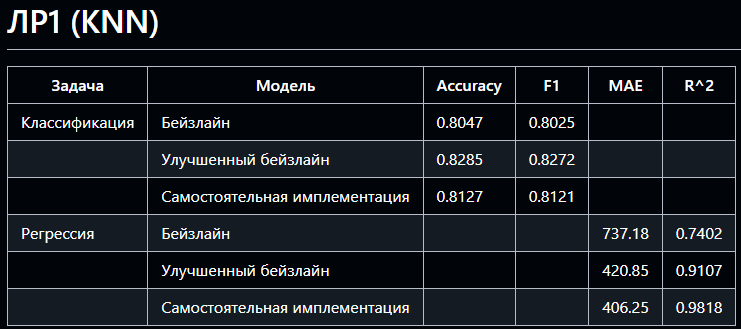

# Вывод для задачи классификации

После улучшения бейзлайна модель улучшила свои показатели:<br>
Accuracy: 0.8047 --> 0.8285 (+2,38%)<br>
F1: 0.8025 --> 0.8272 (+2,47%)<br>
В результате улучшения модель стала более точной<br>
<br>
Самостоятельная имплементация KNN показала почти равные данные по сравнению с бейзлайном и улучшенным бейзлайном.<br>
До улучшения:<br>
Accuracy: 0.8074 <br>
F1: 0.8053 <br>
После улучшения:<br>
Accuracy: 0.8127<br>
F1: 0.81219

# Вывод для задачи регресии

После улучшения бейзлайна модель значительно улучшила свои показатели:<br>
MAE: 737.18 --> 420.85 <br>
R^2: 0.7402 --> 0.9107 <br>
Средняя абсолютная ошибка снизилась с 737 до 420 прокатов <br>
Коэффицент детерминации вырос с 0.74 до 0.91, что указывает на то, что модешль теперь объясняет более 90% дисперсии данных <br>
<br>
Самостоятельная реализация еще больше усовершенствовала модель.<br>2
Рассмотрим результат после улучшения:<br>
MAE: 420.85 --> 406.85<br>
R^2: 0.9107 --> 0.9818